<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/rp_os_pyramids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redpoint/Onsight ladders

In [0]:
# Person being considered

document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"
# document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"

In [0]:
import pandas as pd
import numpy as np
from math import floor
from datetime import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style='whitegrid')

In [0]:
# Get Grade for conversion (from Mountain Project's official grade converter)
grade_chart = pd.read_html("https://www.mountainproject.com/international-climbing-grades")
old_ropes = grade_chart[0].YDSUSA[:-1].to_list()
new_ropes = [0,0,0,0,1,2,3,4,5,6,7,7.4,8,8.4,8.8,9,9.4,9.8]+list(np.round(np.arange(10,16,.1),1))
ropes_convert = dict(zip(old_ropes,new_ropes))

In [0]:
# Supporting functions for clean and prep pipeline
def clean_grade(grade):
  grade = str(grade).split()[0]
  if grade[0] == '5':
    grade = ropes_convert[grade]
    return grade

def x_round(x):
  """ rounds down to nearest .25
  eg. x_round(11.49) = 11.25, x_round(11.51) = 11.5
  """
  if x >= 10:
    return floor(x*4)/4
  else: return x


# Rounding Key example:

# 10a, 10-, 10a/b  -> 10a
# 10b, 10          -> 10b
# 10b/c, 10c, 10+  -> 10c
# 10c/d, 10d       -> 10d

# def grade_to_number(grade):
#   letter_map = {'a':'.0', 'b':'.25', 'c':'.5', 'd':'.75', '-':'.0', '+':'.8'}
#   if grade[-1].isnumeric() == False:
#     grade = grade[:-1] + letter_map[grade[-1]]
#     print(grade)
#   else:
#     grade += '.4'
#     print(grade)


def grade_to_letter(grade):
  letter_map = {'.0':'a', '.25':'b', '.5':'c', '.75':'d'}
  letter_map_low = {'.0':'-', '.4':'', '.8':'+'}
  if grade >= 10:
    grade = str(grade)
    grade = grade[:2] + letter_map[grade[2:]]
    return grade
  else:
    grade = str(grade)
    grade = grade[:1] + letter_map_low[grade[1:]]
    return grade


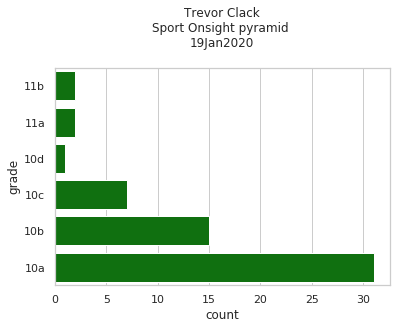

  grade  count
0   11b      2
1   11a      2
2   10d      1
3   10c      7
4   10b     15
5   10a     31


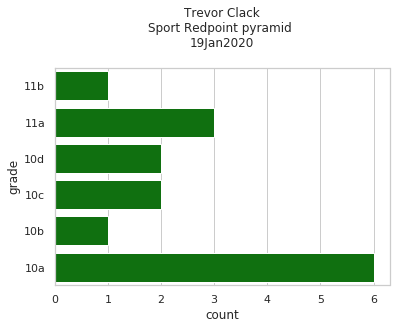

  grade  count
0   11b      1
1   11a      3
2   10d      2
3   10c      2
4   10b      1
5   10a      6


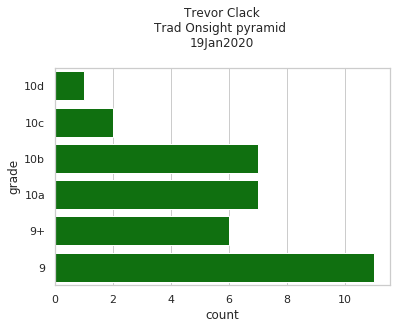

  grade  count
0   10d      1
1   10c      2
2   10b      7
3   10a      7
4    9+      6
5     9     11


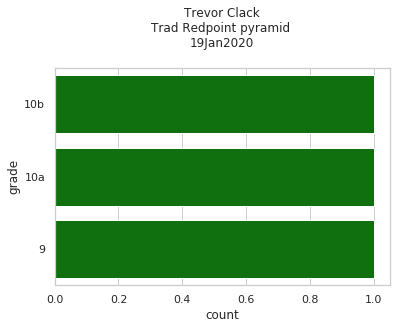

  grade  count
0   10b      1
1   10a      1
2     9      1


In [5]:
climber = document.split('/')[-2].replace('-',' ').title()
date = dt.now().strftime('%-d%b%Y')
data = pd.read_csv(document)
data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
data.grade = data.grade.apply(clean_grade)
data = data[data['style'] == 'Lead']
# Split Trad and Sport data
trad = data[(data['type'] == 'Trad') | (data['type'] == 'Trad, Sport') | (data['type'] == 'Trad, Alpine') | (data['type'] == 'Trad, Aid')]
sport = data[(data['type'] == 'Sport') | (data['type'] == 'Sport, TR')]
trad_rp = trad[trad.lead_style == 'Redpoint']
trad_os = trad[trad.lead_style == 'Onsight']
trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
sport_rp = sport[sport.lead_style == 'Redpoint']
sport_os = sport[sport.lead_style == 'Onsight']


styles = [sport_os, sport_rp, trad_os, trad_rp]

for style in styles:
  if not style.empty:
    title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} {style.iloc[0].lead_style} pyramid \n{date}\n"
    top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
    top_pyramid.columns = ('grade','count')
    top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
    sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
    plt.title(title)
    plt.show()
    print(top_pyramid)



In [6]:
successful_climbs = data[(data.lead_style == 'Redpoint') | (data.lead_style =='Onsight')]
successful_climbs.grade = successful_climbs.grade.apply(lambda x: grade_to_letter(x_round(x)))
successful_climbs_stack = successful_climbs[['grade','route']]
successful_climbs_stack

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,grade,route
0,9,Padewan
1,10c,Yoda
2,10c,False Flag
3,9+,Crisis Actors
4,11a,Agent Orange
...,...,...
492,8,Fear the Smear
493,6-,I'm Just a Bill
495,7-,The Check's in the Mail
538,9,Powder Puff Girls


## Combined redpoint and os pyramid

In [0]:
def make_pyramid(document):
  climber = document.split('/')[-2].replace('-',' ').title()
  date = dt.now().strftime('%-d%b%Y')
  data = pd.read_csv(document)
  data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
  data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
  data.grade = data.grade.apply(clean_grade)
  data = data[data['style'] == 'Lead']
  # Split Trad and Sport data
  trad = data[(data['type'] == 'Trad') | (data['type'] == 'Trad, Sport') | (data['type'] == 'Trad, Alpine') | (data['type'] == 'Trad, Aid')]
  sport = data[(data['type'] == 'Sport') | (data['type'] == 'Sport, TR')]
  trad_rp = trad[trad.lead_style == 'Redpoint']
  trad_os = trad[trad.lead_style == 'Onsight']
  trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
  sport_rp = sport[sport.lead_style == 'Redpoint']
  sport_os = sport[sport.lead_style == 'Onsight']

  sport_combined = pd.concat([sport_rp,sport_os], axis=0)
  trad_combined = pd.concat([trad_rp, trad_os], axis=0)
  styles = [sport_combined, trad_combined]

  pyramids = []
  for style in styles:
    if not style.empty:
      title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} pyramid \n as of {date}\n"
      top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
      top_pyramid.columns = ('grade','count')
      top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
      sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
      plt.title(title)
      plt.show()
      print(top_pyramid)
      print('\n\n\t\ttop 10')
      print(style.sort_values('grade',ascending=False).head(10))
      pyramids.append(top_pyramid)

  return pyramids

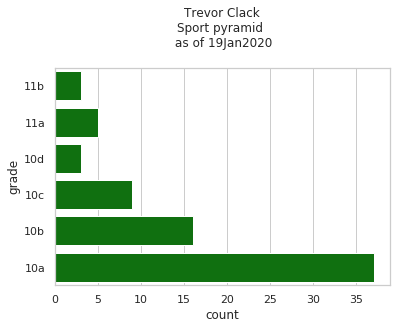

  grade  count
0   11b      3
1   11a      5
2   10d      3
3   10c      9
4   10b     16
5   10a     37


		top 10
                       route  grade style lead_style   type
178            Space Cowboys   11.3  Lead    Onsight  Sport
179                 Sun Dogs   11.3  Lead    Onsight  Sport
12   This Nazi Shit Won't Do   11.3  Lead   Redpoint  Sport
4               Agent Orange   11.2  Lead   Redpoint  Sport
41            Pistol Whipped   11.0  Lead   Redpoint  Sport
180         Starship Trooper   11.0  Lead    Onsight  Sport
165              Jack Jumped   11.0  Lead   Redpoint  Sport
8                Dark Matter   11.0  Lead    Onsight  Sport
122          Tangerine Dream   10.9  Lead   Redpoint  Sport
469    Better Luck Next Time   10.9  Lead    Onsight  Sport


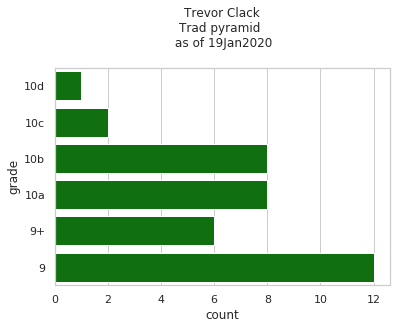

  grade  count
0   10d      1
1   10c      2
2   10b      8
3   10a      8
4    9+      6
5     9     12


		top 10
                                  route  grade style lead_style       type
139                           Two Timer   10.9  Lead    Onsight       Trad
132                 Heart of the Desert   10.6  Lead    Onsight       Trad
154                     Amaretto Corner   10.5  Lead    Onsight       Trad
160                            Jojobean   10.4  Lead    Onsight       Trad
137  Unnamed II (fingers through fists)   10.4  Lead    Onsight       Trad
125                      Stolen Chimney   10.4  Lead    Onsight  Trad, Aid
153                           3AM Crack   10.4  Lead    Onsight       Trad
156            Supercrack of the Desert   10.4  Lead    Onsight       Trad
158                           Manifesto   10.4  Lead    Onsight       Trad
146                           Bar fight   10.4  Lead    Onsight       Trad


In [8]:
# document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"   # Trevor
# document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"  # Morgan

sport_pyramid, trad_pyramid = make_pyramid(document)

## Make suggestions to "fill out" pyramid

In [9]:
# pros are usually 1, 3, 20, 50, 100 (based on 8a.nu)
# intermediate maybe 1, 3, 10, 20, 30
# 1 2 4 8 12 seems reasonable for a beginner


sport_pyramid

,grade,count
0,11b,3
1,11a,5
2,10d,3
3,10c,9
4,10b,16
5,10a,37


In [0]:
grades_list = '0 1 2 3 4 5 6 7 7+ 8- 8 8+ 9- 9 9+'.split()

numbs = '10 11 12 13 14 15'.split()
letters =  list('abcd')
for i in numbs:
  for j in letters:
    grades_list.append(i+j)

def suggest_pyramid(pyramid):
  scheme = [1,2,4,8,12] # may need to pass in later or set as "class global"
  print(pyramid.copy().iloc[0].grade)
  top_index = grades_list.index(pyramid.grade[0]) + 1

  user_grade_count_dict = dict(zip(pyramid.grade, pyramid['count']))
  top_5_grades = grades_list[top_index : top_index - 5 : -1]
  top_5_count = [ user_grade_count_dict.get(grade,0) for grade in top_5_grades] # 2nd argument in .get() gives value to be returned if non-existent

  pyramid_copy = pd.DataFrame(zip(top_5_grades, top_5_count), columns = ['grade','count']).iloc[:5]
  pyramid_copy['ideal_count'] = scheme
  pyramid_copy['todo'] = pyramid_copy.ideal_count - pyramid_copy['count']
  pyramid_copy.todo = pyramid_copy.todo.apply(lambda x: 0 if (x < 1) else x) # negative numbers -> 0 
  print(pyramid_copy)
  return pyramid_copy

In [15]:
suggested_pyramid = suggest_pyramid(sport_pyramid)

11b
  grade  count  ideal_count  todo
0   11c      0            1     1
1   11b      3            2     0
2   11a      5            4     0
3   10d      3            8     5
4   10c      9           12     3


In [17]:
## Scraping to make recommendations
url  = "https://www.mountainproject.com/area/classics/105865045/new-jack-city"
url = "https://www.mountainproject.com/area/classics/108189726/fairview-mountain"
import pandas as pd
import numpy as np
table = pd.read_html(url)[1]
table = table[table.Difficulty.str.startswith('5.')]
# grades
grades = table.Difficulty.apply(lambda x: x.split()[0])
grades = grades.apply(lambda x: x_round(ropes_convert[x])).apply(grade_to_letter) # remove V grades, convert to simplified letter grades
# routes
routes = table['Route Name'].apply(lambda x: ' '.join(x.split()[1:]))
# putting them together
recommendations_dict = {'grade':grades, 'route':routes}
recommendations_df = pd.DataFrame(recommendations_dict)

###################################################
#TEMP - make global/classvariable: assume we have user's 5 sought after grades: 
top_index = grades_list.index(sport_pyramid.grade[0]) + 1
user_grade_count_dict = dict(zip(sport_pyramid.grade, sport_pyramid['count']))
top_5_grades = grades_list[top_index : top_index - 5 : -1] # list of top grades as string
top_5_count = [ user_grade_count_dict.get(grade,0) for grade in top_5_grades] # 2nd argument in .get() gives value to be returned if non-existent
###################################################

recommendations_df = recommendations_df[recommendations_df.route.isin(successful_climbs_stack.route) == False] # returns area classics that haven't been climbed
recommendations_df = recommendations_df[recommendations_df.grade.str.contains('|'.join(top_5_grades))][::-1].reset_index(drop=True) # returns the right grade range (| in the string will give an "or" effect)
recommendations_df[recommendations_df.grade.isin(suggested_pyramid[suggested_pyramid.todo > 0].grade)] # remove grades within the suggested range that have been "overclimbed"

,grade,route
0,11c,Lean Cuisine
6,10d,Light Saber
7,10d,Stretch Armstrong
8,10d,Jangofet
9,10c,Space Wrangler
10,10c,Sidewinder
11,10c,Black Dog
12,10c,You Must Face Vader


# Create Class

In [0]:
class Pyramid:
  def __init__(self,document):
    self.document = document
    self.climber = document.split('/')[-2].replace('-',' ').title()
    #date = dt.now().strftime('%-d%b%Y')
    self.data = pd.read_csv(document)
    self.data = self.data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
    self.data = self.data.rename(columns = (dict(zip(self.data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
    self.data.grade = self.data.grade.apply(clean_grade)
    self.data = self.data[self.data['style'] == 'Lead']
    # Split Trad and Sport data
    self.trad = self.data[(self.data['type'] == 'Trad') | (self.data['type'] == 'Trad, Sport') | (self.data['type'] == 'Trad, Alpine') | (self.data['type'] == 'Trad, Aid')]
    self.sport = self.data[(self.data['type'] == 'Sport') | (self.data['type'] == 'Sport, TR')]
    self.trad_rp = self.trad[self.trad.lead_style == 'Redpoint']
    self.trad_os = self.trad[self.trad.lead_style == 'Onsight']
    self.trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
    self.sport_rp = self.sport[self.sport.lead_style == 'Redpoint']
    self.sport_os = self.sport[self.sport.lead_style == 'Onsight']

    self.sport_combined = pd.concat([self.sport_rp,self.sport_os], axis=0)
    self.trad_combined = pd.concat([self.trad_rp, self.trad_os], axis=0)
    self.styles = [self.sport_combined, self.trad_combined]

  @staticmethod
  def clean_grade(grade):
    grade = str(grade).split()[0]
    if grade[0] == '5':
      grade = ropes_convert[grade]
      return grade

  @staticmethod
  def x_round(x):
    """ rounds down to nearest .25
    eg. x_round(11.49) = 11.25, x_round(11.51) = 11.5
    """
    if x >= 10:
      return floor(x*4)/4
    return x

  @staticmethod
  def grade_to_letter(grade):
    letter_map = {'.0':'a', '.25':'b', '.5':'c', '.75':'d'}
    letter_map_low = {'.0':'-', '.4':'', '.8':'+'}
    if grade >= 10:
      grade = str(grade)
      grade = grade[:2] + letter_map[grade[2:]]
      return grade
    else:
      grade = str(grade)
      grade = grade[:1] + letter_map_low[grade[1:]]
      return grade

  def show_pyramids(self):
    self.pyramids = []
    for style in self.styles:
      if not style.empty:
        title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} pyramid \n as of {date}\n"
        top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
        top_pyramid.columns = ('grade','count')
        top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
        sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
        plt.title(title)
        plt.show()
        print(top_pyramid)
        print('\n\n\t\ttop 10')
        print(style.sort_values('grade',ascending=False).head(10))
        self.pyramids.append(top_pyramid)
    return self.pyramids

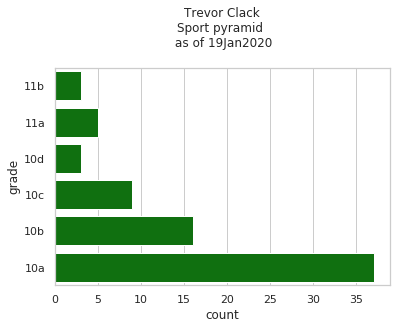

  grade  count
0   11b      3
1   11a      5
2   10d      3
3   10c      9
4   10b     16
5   10a     37


		top 10
                       route  grade style lead_style   type
178            Space Cowboys   11.3  Lead    Onsight  Sport
179                 Sun Dogs   11.3  Lead    Onsight  Sport
12   This Nazi Shit Won't Do   11.3  Lead   Redpoint  Sport
4               Agent Orange   11.2  Lead   Redpoint  Sport
41            Pistol Whipped   11.0  Lead   Redpoint  Sport
180         Starship Trooper   11.0  Lead    Onsight  Sport
165              Jack Jumped   11.0  Lead   Redpoint  Sport
8                Dark Matter   11.0  Lead    Onsight  Sport
122          Tangerine Dream   10.9  Lead   Redpoint  Sport
469    Better Luck Next Time   10.9  Lead    Onsight  Sport


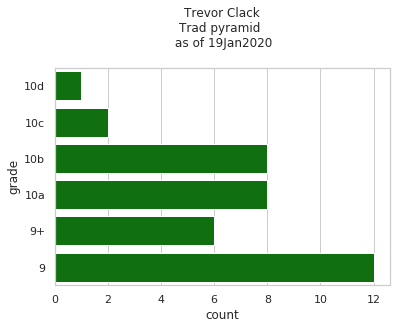

  grade  count
0   10d      1
1   10c      2
2   10b      8
3   10a      8
4    9+      6
5     9     12


		top 10
                                  route  grade style lead_style       type
139                           Two Timer   10.9  Lead    Onsight       Trad
132                 Heart of the Desert   10.6  Lead    Onsight       Trad
154                     Amaretto Corner   10.5  Lead    Onsight       Trad
160                            Jojobean   10.4  Lead    Onsight       Trad
137  Unnamed II (fingers through fists)   10.4  Lead    Onsight       Trad
125                      Stolen Chimney   10.4  Lead    Onsight  Trad, Aid
153                           3AM Crack   10.4  Lead    Onsight       Trad
156            Supercrack of the Desert   10.4  Lead    Onsight       Trad
158                           Manifesto   10.4  Lead    Onsight       Trad
146                           Bar fight   10.4  Lead    Onsight       Trad


[  grade  count
 0   11b      3
 1   11a      5
 2   10d      3
 3   10c      9
 4   10b     16
 5   10a     37,   grade  count
 0   10d      1
 1   10c      2
 2   10b      8
 3   10a      8
 4    9+      6
 5     9     12]

In [23]:
P = Pyramid(document)
P.show_pyramids()